In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("BostonHousing.csv")

###### CRIM - per capita crime rate by town
###### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
###### INDUS - proportion of non-retail business acres per town.
###### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
###### NOX - nitric oxides concentration (parts per 10 million)
###### RM - average number of rooms per dwelling
###### AGE - proportion of owner-occupied units built prior to 1940
###### DIS - weighted distances to five Boston employment centres
###### RAD - index of accessibility to radial highways
###### TAX - full-value property-tax rate per 10,000 dollors
###### PTRATIO - pupil-teacher ratio by town
###### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###### LSTAT - % lower status of the population
###### MEDV - Median value of owner-occupied homes in $1000's

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.index

RangeIndex(start=0, stop=506, step=1)

In [9]:
df.shape

(506, 14)

In [10]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [11]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

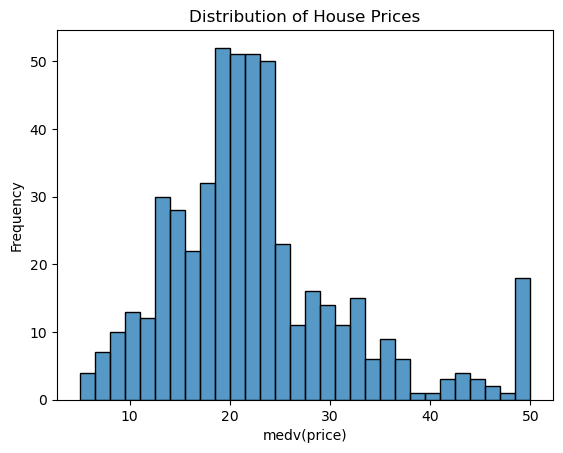

In [24]:
sns.histplot(df['medv'], bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('medv(price)')
plt.ylabel('Frequency')
plt.show()

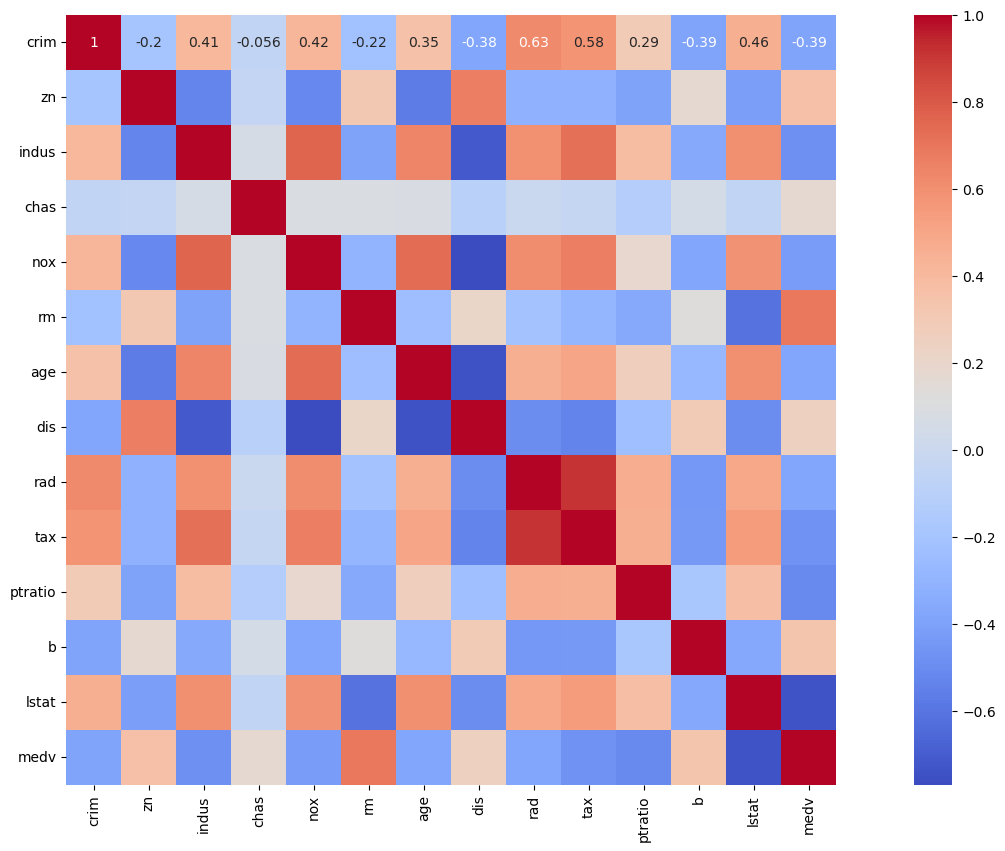

In [38]:
names=[]
correlations = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlations,square = True,cmap = "coolwarm",annot = True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [13]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column b outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


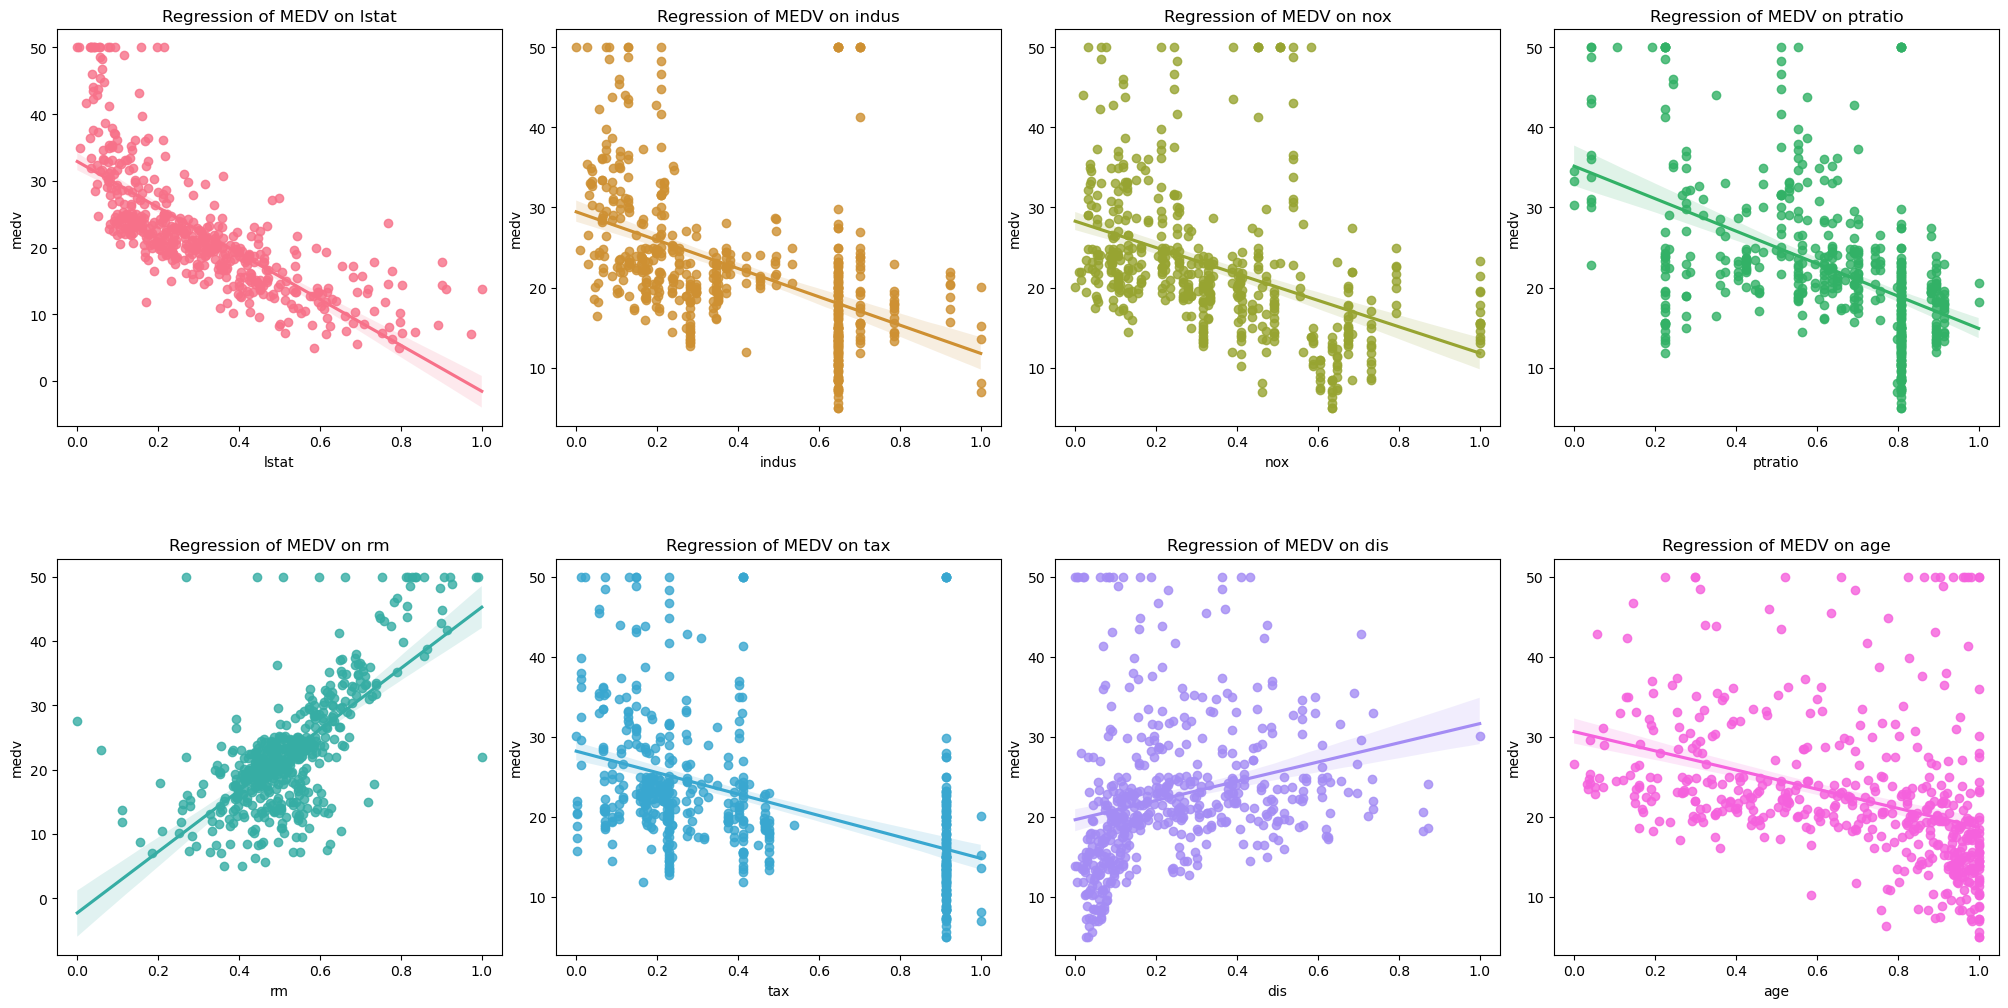

In [20]:
from sklearn import preprocessing

# Assuming you have already loaded your DataFrame 'df'
# Scaling the selected columns
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
x = df.loc[:, column_sels]
y = df['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Create subplots
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Define a list of colors for each plot
colors = sns.color_palette("husl", len(column_sels))

# Generate regression plots with different colors
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i], color=colors[i])
    axs[i].set_title(f'Regression of MEDV on {k}')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [18]:
X = df.drop(columns = 'medv')
y = df['medv']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = lr_model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.291119474973446
R-squared: 0.6687594935356329


In [48]:
# Function to take user input and predict house price
def predict_house_price():
    # List of feature names and their corresponding value ranges (approximate)
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }

    # Initialize an empty list to store user inputs
    user_input = []

    print("Please enter the following values for the house:")

    # Loop through each feature and get input from the user, specifying ranges
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))  # Get the value from user
        user_input.append(value)

    # Convert user input into a NumPy array and reshape it for prediction
    input_data = np.array(user_input).reshape(1, -1)

    # Make prediction using the trained linear regression model
    predicted_price = lr_model.predict(input_data)

    # Output the predicted price
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")

# Call the function to predict house price based on user input
predict_house_price()

Please enter the following values for the house:
Enter value for crim (per capita crime rate by town (range: 0 to 100)): 50
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)): 50
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)): 15
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)): 0
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)): 0.5
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)): 6
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)): 50
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)): 8
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)): 12
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)): 250
Enter value for ptratio (pupil-teacher ratio 

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled,y_train)

LinearRegression()

In [60]:
y_pred1 = lr_model_scaled.predict(X_test_scaled)

In [61]:
mse = mean_squared_error(y_test,y_pred1)
r2 = r2_score(y_test,y_pred1)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 27.406836284337288
R-squared: 0.6262727067493542


In [62]:
# Function to take user input and predict house price
def predict_house_price():
    # List of feature names and their corresponding value ranges (approximate)
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }

    # Initialize an empty list to store user inputs
    user_input = []

    print("Please enter the following values for the house:")

    # Loop through each feature and get input from the user, specifying ranges
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))  # Get the value from user
        user_input.append(value)

    # Convert user input into a NumPy array and reshape it for prediction
    input_data = np.array(user_input).reshape(1, -1)

    # Make prediction using the trained linear regression model
    predicted_price = lr_model_scaled.predict(input_data)

    # Output the predicted price
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")

# Call the function to predict house price based on user input
predict_house_price()

Please enter the following values for the house:
Enter value for crim (per capita crime rate by town (range: 0 to 100)): 50
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)): 50
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)): 15
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)): 0
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)): 0.5
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)): 6
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)): 50
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)): 8
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)): 12
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)): 250
Enter value for ptratio (pupil-teacher ratio 